### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [266]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [229]:
df = pd.read_csv('data/clusterization/marketing_campaign.csv', delimiter='\t')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [187]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Є 24 пропущениїх значення в колонці income


In [188]:
print("Mean {}, median {}".format(df.Income.mean(), df.Income.median()))

Mean 52247.25135379061, median 51381.5


In [230]:
df[df.Income.isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

Запитала в chatGPT, дуже цікавим був варіант навчити регресійну модель за полями прогнозувати Income і ці значення використовувати для заповнення значень) запам"ятаю, а в цій задачі використаю простішу рекомендацію - заповними медіаною для груп користувачів за колонкою education

In [190]:
median_income = df.groupby('Education')['Income'].mean()

In [191]:
median_income_dict = median_income.to_dict()
median_income_dict

{'2n Cycle': 47633.19,
 'Basic': 20306.25925925926,
 'Graduation': 52720.37365591398,
 'Master': 52917.53424657534,
 'PhD': 56145.31392931393}

In [231]:
for education_level, mean_income in median_income_dict.items(): 
    df.loc[(df.Income.isna()) & (df.Education==education_level), 'Income'] = mean_income

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [232]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [234]:
categorical_columns = df.select_dtypes("object")
for col in categorical_columns:
    print(df[col].value_counts())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: count, Length: 663, dtype: int64


In [235]:
df['Dt_Customer_ymd'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

In [236]:
start_date = df['Dt_Customer_ymd'].min()

df['Month_Index'] = (df['Dt_Customer_ymd'].dt.year - start_date.year) * 12 + (df['Dt_Customer_ymd'].dt.month - start_date.month)


In [237]:
number_cols = df.drop(columns='ID').select_dtypes("number").columns.to_list()

In [238]:
categorical_cols_onehot = ['Marital_Status']
education_ordered = [['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']]
categorical_cols_ordinal = ['Education']

In [239]:
ohe = OneHotEncoder()
ohe.fit(df[categorical_cols_onehot])
ohe_columns = ohe.get_feature_names_out().tolist()
df[ohe_columns] = ohe.transform(df[categorical_cols_onehot]).toarray()

In [240]:
oe = OrdinalEncoder(categories=education_ordered)
df['Education_Encoded'] = oe.fit_transform(df[categorical_cols_ordinal])

In [241]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Month_Index,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_Encoded
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,19,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0


In [242]:
X = df[number_cols+ohe_columns+['Education_Encoded']]

In [243]:
X.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Month_Index,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_Encoded
0,1957,58138.0,0,0,58,635,88,546,172,88,...,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,19,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0


Хочу Dt_Customer поділити на проміжки часу, зрозуміліше всього це зробити, розділивши на календарні місяці

Колонку Education можна кодувати OrderingEncoding, Dt_Customer потрібно розбити на діапазони дат, Marital_Status - OneHotEncoder (тому що OrderingEncoding може створити хибне відчуття порядку)

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [244]:
kmeansmodel = KMeans(n_clusters=3, n_init='auto')
predictedKMeans = kmeansmodel.fit_predict(X)
silouette_score_kmeans = silhouette_score(X, predictedKMeans)

In [245]:
print("Silouette score for KMeans with n_clusters=3 equals {}".format(silouette_score_kmeans.round(2)))

Silouette score for KMeans with n_clusters=3 equals 0.6


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [205]:
X.columns.to_list()

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Month_Index',
 'Marital_Status_Absurd',
 'Marital_Status_Alone',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'Marital_Status_YOLO',
 'Education_Encoded']

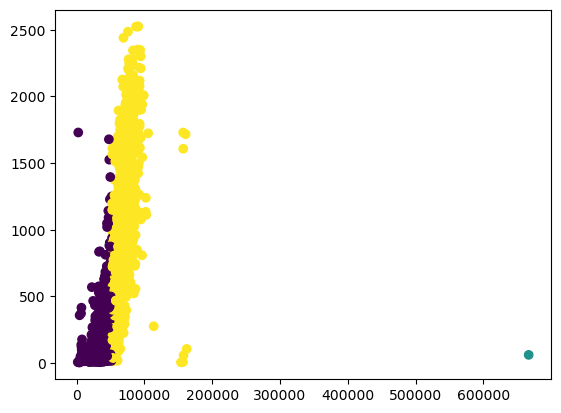

In [246]:
plt.scatter(X['Income'], X['MntWines']+X['MntFruits']+X['MntMeatProducts']+X['MntFishProducts']+X['MntSweetProducts']+X['MntGoldProds'], c=predictedKMeans)

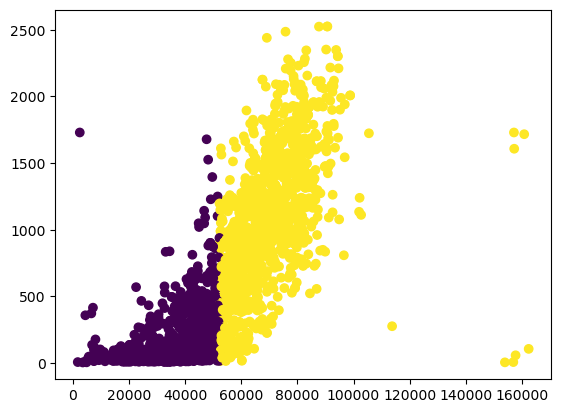

In [247]:
merdedFrame = df
merdedFrame['clusters'] = predictedKMeans
merdedFrame = merdedFrame[merdedFrame['Income']<500000]
plt.scatter(merdedFrame['Income'], merdedFrame['MntWines']+merdedFrame['MntFruits']+merdedFrame['MntMeatProducts']+merdedFrame['MntFishProducts']+merdedFrame['MntSweetProducts']+merdedFrame['MntGoldProds'], c=merdedFrame['clusters'])

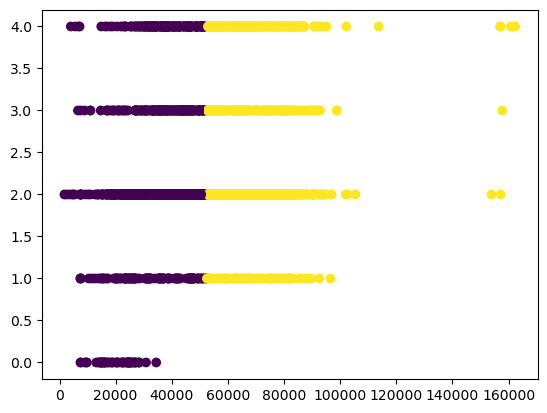

In [248]:

plt.scatter(merdedFrame['Income'], merdedFrame['Education_Encoded'], c=merdedFrame['clusters'])

Із спостережень - люди з нижчою освітою витрачають менше на покупки, а 
люди з більшим доходом витрачають більше, водночас поділ на кластери не очевидний

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [249]:
df[number_cols]

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Month_Index
0,1957,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,3,11,1,2
1,1954,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,3,11,0,20
2,1965,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,3,11,0,13
3,1984,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,3,11,0,19
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,3,11,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,0,0,3,11,0,11
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,1,0,0,3,11,0,23
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,0,1,0,0,0,0,3,11,0,18
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,0,0,0,3,11,0,18


In [252]:
Xsc = df[number_cols+ohe_columns+['Education_Encoded']]
scaler = MinMaxScaler()
Xsc.loc[:, number_cols] = scaler.fit_transform(Xsc[number_cols])

In [253]:
kmeansmodel_sc = KMeans(n_clusters=3, n_init='auto')
predictedKMeansSc = kmeansmodel_sc.fit_predict(Xsc)
silouette_score_kmeans = silhouette_score(Xsc, predictedKMeansSc)
print("Silouette score for KMeans with n_clusters=3 equals {}".format(silouette_score_kmeans.round(2)))

Silouette score for KMeans with n_clusters=3 equals 0.18


Метрика погіршилася

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [254]:
q75, q25 = np.percentile(df['Income'], [75 ,25])
iqr = q75 - q25
top_income = q75 + 1.5 * q25
print("Top Income amount {}".format(top_income))

Top Income amount 121597.875


In [213]:
cl_df = df[df['Income'] < top_income]
used_columns = number_cols+ohe_columns+['Education_Encoded']
print(used_columns)

['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Month_Index', 'Marital_Status_Absurd', 'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO', 'Education_Encoded']


In [255]:
final_X = cl_df[used_columns]
final_X.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Month_Index,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_Encoded
0,1957,58138.0,0,0,58,635,88,546,172,88,...,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,19,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0


**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

In [256]:
K = range(1, 10)
sosd = [] #sum of square distances
for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(final_X)
    sosd.append(model.inertia_)

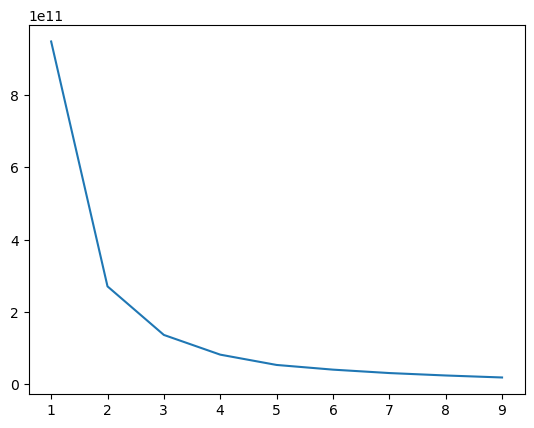

In [257]:
plt.plot(K, sosd)

На мою думку це може бути і 2 і 3

Для експерименту порахуємо silouette для  n_clusters=5

In [262]:
modelkmeans5 = KMeans(n_clusters=5, n_init='auto').fit(final_X)
predkmeans5 = modelkmeans5.predict(final_X)
silouettekmeans5 = silhouette_score(final_X, predkmeans5)
print("Silouette {}".format(silouettekmeans5))

Silouette 0.5396949681747863


In [263]:
modelkmeans2 = KMeans(n_clusters=2, n_init='auto').fit(final_X)
predkmeans2 = modelkmeans2.predict(final_X)
silouettekmeans2 = silhouette_score(final_X, predkmeans2)
print("Silouette {}".format(silouettekmeans2))

Silouette 0.604296382014514


Висновок - оптимально тут буде використовувати два класи

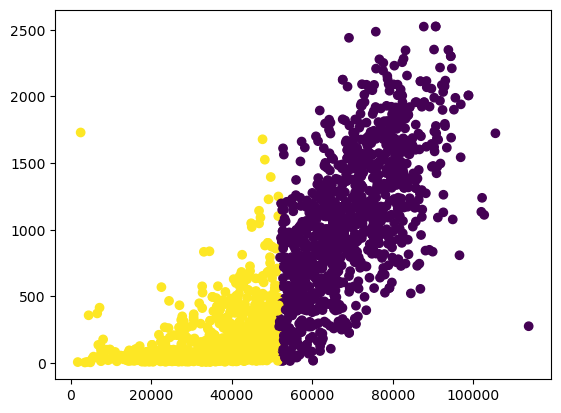

In [265]:
plt.scatter(final_X['Income'], final_X['MntWines']+final_X['MntFruits']+final_X['MntMeatProducts']+final_X['MntFishProducts']+final_X['MntSweetProducts']+final_X['MntGoldProds'], c=predkmeans2)

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

{'icoord': [[55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [135.0, 135.0, 153.75, 153.75],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [203.75, 203.75, 243.75, 243.75],
  [185.0, 185.0, 223.75, 223.75],
  [144.375, 144.375, 204.375, 204.375],
  [125.0, 125.0, 174.375, 174.375],
  [115.0, 115.0, 149.6875, 149.6875],
  [105.0, 105.0, 132.34375, 132.34375],
  [90.0, 90.0, 118.671875, 118.671875],
  [75.0, 75.0, 104.3359375, 104.3359375],
  [60.0, 60.0, 89.66796875, 89.66796875],
  [45.0, 45.0, 74.833984375, 74.833984375],
  [35.0, 35.0, 59.9169921875, 59.9169921875],
  [25.0, 25.0, 47.45849609375, 47.45849609375],
  [15.0, 15.0, 36.229248046875, 36.229248046875],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [25.614624

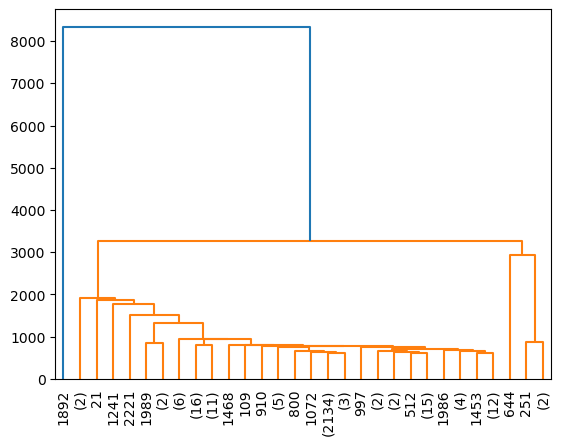

In [268]:
dist_sin = linkage(final_X, method='single')
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')

In [269]:
final_X['clust_2'] = fcluster(dist_sin, 2, criterion='maxclust')
final_X['clust_3'] = fcluster(dist_sin, 3, criterion='maxclust')

/var/folders/2z/b500qw6s6cx6j167ynb3767c0000gn/T/ipykernel_71657/2957240711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_X['clust_2'] = fcluster(dist_sin, 2, criterion='maxclust')
/var/folders/2z/b500qw6s6cx6j167ynb3767c0000gn/T/ipykernel_71657/2957240711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_X['clust_3'] = fcluster(dist_sin, 3, criterion='maxclust')


In [271]:
silouette_fclust_2 = silhouette_score(final_X.drop(columns=['clust_2', 'clust_3']), final_X['clust_2'])
silouette_fclust_3 = silhouette_score(final_X.drop(columns=['clust_2', 'clust_3']), final_X['clust_3'])
print("Silouette fclust 2 {}, fclust 3 {}".format(silouette_fclust_2, silouette_fclust_3))

Silouette fclust 2 0.5573876317362689, fclust 3 0.45053219905643477


Візуально виділяється 3 класи на дереві, хоча по метриках краще 2

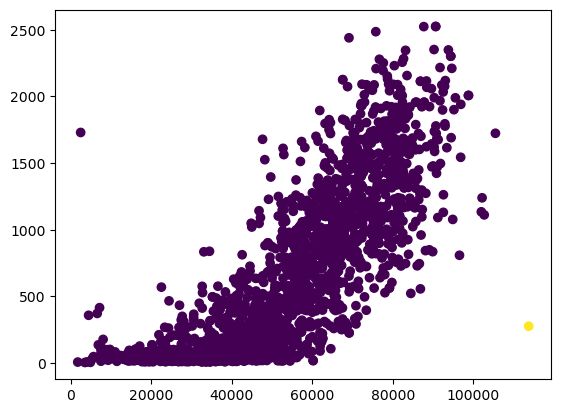

In [275]:
plt.scatter(final_X['Income'], final_X['MntWines']+final_X['MntFruits']+final_X['MntMeatProducts']+final_X['MntFishProducts']+final_X['MntSweetProducts']+final_X['MntGoldProds'], c=final_X['clust_2'])

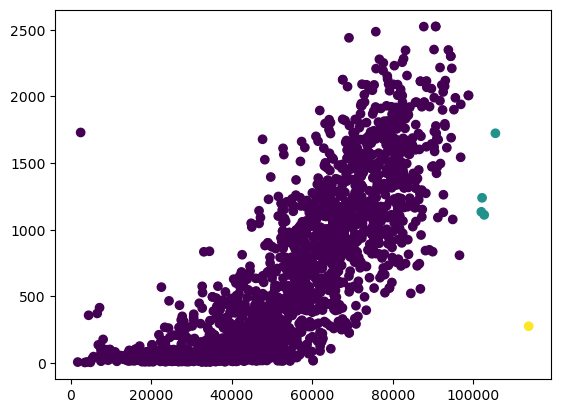

In [276]:
plt.scatter(final_X['Income'], final_X['MntWines']+final_X['MntFruits']+final_X['MntMeatProducts']+final_X['MntFishProducts']+final_X['MntSweetProducts']+final_X['MntGoldProds'], c=final_X['clust_3'])

Ну і судячи з усіх попередніх графіків і цих - тут  виділяється 1 клас і кілька викидів, які не варто розглядати окремо як клас

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [32.5, 32.5, 62.5, 62.5],
  [10.0, 10.0, 47.5, 47.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [122.5, 122.5, 152.5, 152.5],
  [92.5, 92.5, 137.5, 137.5],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [180.0, 180.0, 202.5, 202.5],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [260.0, 260.0, 282.5, 282.5],
  [232.5, 232.5, 271.25, 271.25],
  [191.25, 191.25, 251.875, 251.875],
  [115.0, 115.0, 221.5625, 221.5625],
  [28.75, 28.75, 168.28125, 168.28125]],
 'dcoord': [[0.0, 11789.227158724188, 11789.227158724188, 0.0],
  [0.0, 573

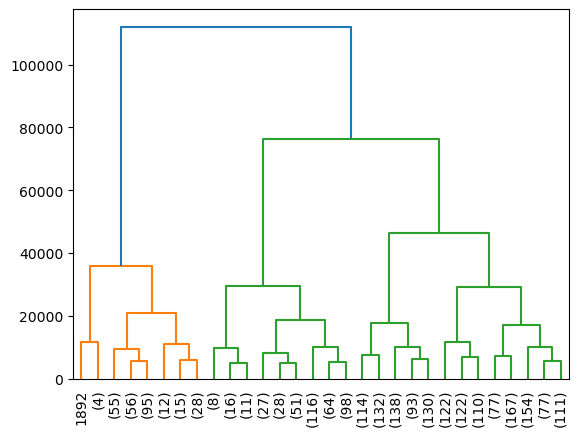

In [277]:
dist_complete = linkage(final_X, method='complete')
dendrogram(dist_complete, leaf_rotation=90, truncate_mode='lastp')

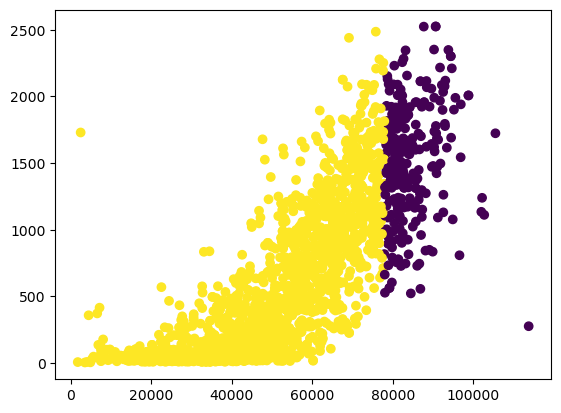

In [283]:
link_compl_2 = fcluster(dist_complete, 2, criterion='maxclust')
link_compl_3 = fcluster(dist_complete, 3, criterion='maxclust')
plt.scatter(final_X['Income'], 
            final_X['MntWines']+
            final_X['MntFruits']+
            final_X['MntMeatProducts']+
            final_X['MntFishProducts']+
            final_X['MntSweetProducts']+
            final_X['MntGoldProds'], 
            c=link_compl_2)


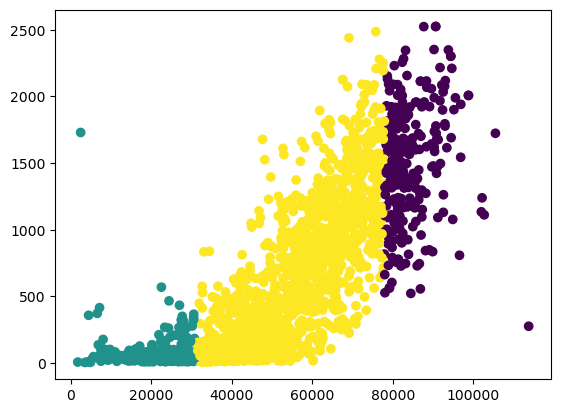

In [284]:
plt.scatter(final_X['Income'], 
            final_X['MntWines']+
            final_X['MntFruits']+
            final_X['MntMeatProducts']+
            final_X['MntFishProducts']+
            final_X['MntSweetProducts']+
            final_X['MntGoldProds'], 
            c=link_compl_3)

Ця типізація мені більше імпонує))

In [287]:
# порахуємо для неї силует
silouette_link_compl = silhouette_score(final_X.drop(columns=['clust_2', 'clust_3']), link_compl_3)
silouette_link_compl_2 = silhouette_score(final_X.drop(columns=['clust_2', 'clust_3']), link_compl_2)
print("Silouette for complete link for 3 claases = {}, for 2 classes = {}".format(silouette_link_compl, silouette_link_compl_2))

Silouette for complete link for 3 claases = 0.33447299324810154, for 2 classes = 0.3879066110623849


Показники силует не дуже відверто кажучи()

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [20.0, 20.0, 42.5, 42.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [72.5, 72.5, 110.0, 110.0],
  [31.25, 31.25, 91.25, 91.25],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [150.0, 150.0, 190.0, 190.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [255.0, 255.0, 265.0, 265.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [260.0, 260.0, 282.5, 282.5],
  [223.75, 223.75, 271.25, 271.25],
  [170.0, 170.0, 247.5, 247.5],
  [61.25, 61.25, 208.75, 208.75],
  [5.0, 5.0, 135.0, 135.0]],
 'dcoord': [[0.0, 3178.6474396035387, 3178.6474396035387, 0.0],
  [0.0, 3262.2285583366

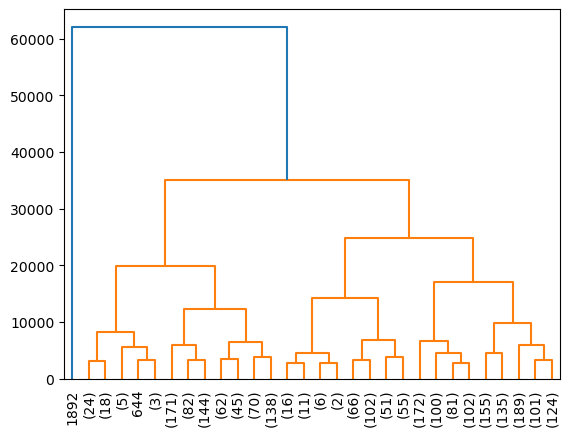

In [281]:
dist_average = linkage(final_X, method='average')
dendrogram(dist_average, leaf_rotation=90, truncate_mode='lastp')

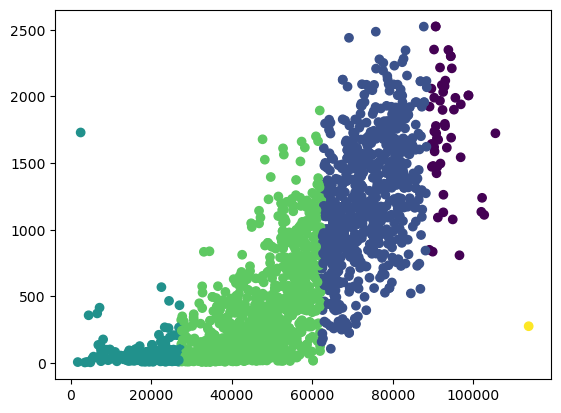

In [282]:
#експеримент
link_average_5 = fcluster(dist_average, 5, criterion='maxclust')
plt.scatter(final_X['Income'], 
            final_X['MntWines']+
            final_X['MntFruits']+
            final_X['MntMeatProducts']+
            final_X['MntFishProducts']+
            final_X['MntSweetProducts']+
            final_X['MntGoldProds'], 
            c=link_average_5)

5 явно забагато

### Висновок

На мою думку тут немає розподілу на класи, є група даних і викиди